In [1]:
import pandas as pd

In [2]:
DATASETS_PATH = "data/datasets"

# read AR_LIGANDS of Papyrus dataset
df_papyrus = pd.read_csv(
    f"{DATASETS_PATH}/A1R_LIGANDS.tsv",
    sep="\t",
    header=0,
    na_values=("NA", "nan", "NaN"),
)

# read AR ligands of cortellis dataset
df_cortellis = pd.read_csv(
    f"{DATASETS_PATH}/cortellis_A1R.csv",
    header=0,
    na_values=("NA", "nan", "NaN"),
)

# keep SMILES and pchembl_value_Median columns
df_papyrus = pd.concat(
    [df_papyrus["SMILES"], df_papyrus["pchembl_value_Median"]], axis=1
)
df_cortellis = pd.concat(
    [df_cortellis["SMILES"], df_cortellis["regression_label"]], axis=1
)
df_cortellis.rename(
    columns={"regression_label": "pchembl_value_Median"},
    inplace=True,
)

# merge 2 datasets
df = pd.concat([df_papyrus, df_cortellis])

# remove duplicate rows
df.drop_duplicates(inplace=True)

# save merged dataset
df.to_csv(f"{DATASETS_PATH}/A1R_papyrus_cortellis.csv")

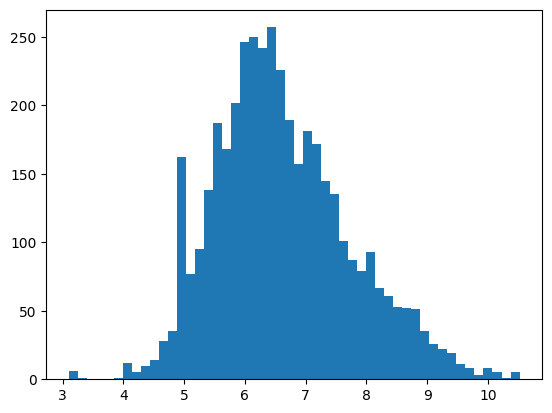

In [17]:
import matplotlib.pyplot as plt
plt.hist(df['pchembl_value_Median'], bins=50)
# plt.ylim(0, 30)
plt.show()